# Mise au format du dataframe pour exploitation des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




In [2]:
#importation des données du fichier json
df = pd.read_json('/Users/wltrh/Documents/data-projet/json/histo-bitcoin-eur.json') 

In [3]:
#création d'un dataframe avec les données de la colonne prices, market_caps et total_volumes avec séparation de la date
df[['date', 'price']] = df['prices'].apply(lambda x: pd.Series([x[0], x[1]])).add_prefix('price_')
df[['date', 'market_cap']] = df['market_caps'].apply(lambda x: pd.Series([x[0], x[1]])).add_prefix('market_cap_')
df[['date', 'total_volume']] = df['total_volumes'].apply(lambda x: pd.Series([x[0], x[1]])).add_prefix('total_volume_')

#suppression des colonnes inutiles
df.drop(['prices', 'market_caps', 'total_volumes'], axis=1, inplace=True)

#conversion de la date en datetime
df['date'] = pd.to_datetime(df['date'], unit='ms')
#mise de la date au format datetime année-mois-jour-heure
df['date'] = df['date'].dt.strftime('%Y-%m-%d %H:%M')
#mise de la date en index
df.set_index('date', inplace=True)
df.head()

,price,market_cap,total_volume
date,,,
2020-01-01 00:00,6412.846398,1.162167e+11,1.888419e+10
2020-01-02 00:00,6412.448167,1.162156e+11,1.615514e+10
2020-01-03 00:00,6234.201691,1.130466e+11,1.818484e+10
2020-01-04 00:00,6541.826288,1.189716e+11,2.779318e+10
2020-01-05 00:00,6587.554275,1.196064e+11,1.847005e+10


In [4]:
#recherche de la date max et min du dataframe
print(df.index.min())
print(df.index.max())

#mise au format monnaie de la colonne price
df['price'] = df['price'].apply(lambda x: '{:,.2f}'.format(x))
#mise au format monnaie de la colonne market_cap
df['market_cap'] = df['market_cap'].apply(lambda x: '{:,.2f}'.format(x))
#mise au format monnaie de la colonne total_volume
df['total_volume'] = df['total_volume'].apply(lambda x: '{:,.2f}'.format(x))
df.head()

2020-01-01 00:00
2020-12-30 00:00


,price,market_cap,total_volume
date,,,
2020-01-01 00:00,"6,412.85","116,216,742,057.95","18,884,188,678.92"
2020-01-02 00:00,"6,412.45","116,215,590,189.45","16,155,139,798.54"
2020-01-03 00:00,"6,234.20","113,046,563,387.22","18,184,839,034.55"
2020-01-04 00:00,"6,541.83","118,971,582,364.60","27,793,175,077.02"
2020-01-05 00:00,"6,587.55","119,606,426,253.68","18,470,049,433.00"


In [5]:
#enlever les heurs de la date
df.index = df.index.str[:10]
df.head()

,price,market_cap,total_volume
date,,,
2020-01-01,"6,412.85","116,216,742,057.95","18,884,188,678.92"
2020-01-02,"6,412.45","116,215,590,189.45","16,155,139,798.54"
2020-01-03,"6,234.20","113,046,563,387.22","18,184,839,034.55"
2020-01-04,"6,541.83","118,971,582,364.60","27,793,175,077.02"
2020-01-05,"6,587.55","119,606,426,253.68","18,470,049,433.00"


In [6]:
#passer les données en float
df['price'] = df['price'].str.replace(',', '').astype(float)
df['market_cap'] = df['market_cap'].str.replace(',', '').astype(float)
df['total_volume'] = df['total_volume'].str.replace(',', '').astype(float)
df.head()

,price,market_cap,total_volume
date,,,
2020-01-01,6412.85,1.162167e+11,1.888419e+10
2020-01-02,6412.45,1.162156e+11,1.615514e+10
2020-01-03,6234.20,1.130466e+11,1.818484e+10
2020-01-04,6541.83,1.189716e+11,2.779318e+10
2020-01-05,6587.55,1.196064e+11,1.847005e+10


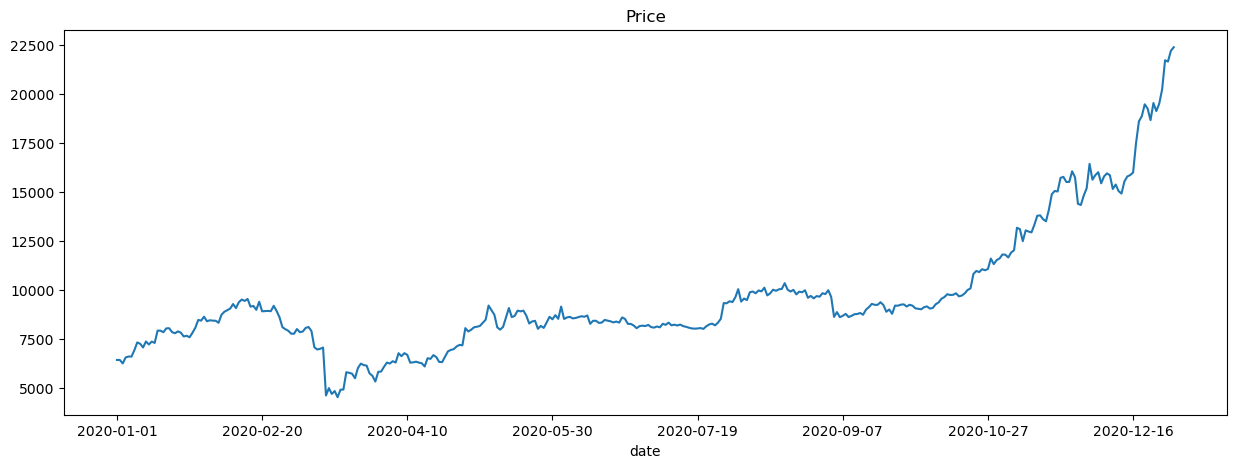

In [7]:
#graphipe de la colonne price
df['price'].plot(figsize=(15, 5), title='Price')
plt.show()

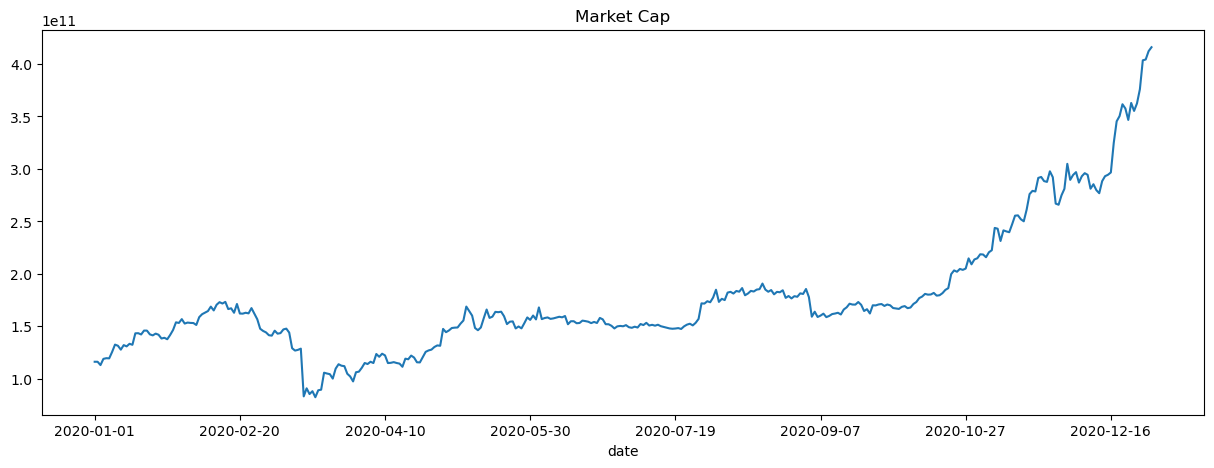

In [8]:
#graphique de la colonne market_cap
df['market_cap'].plot(figsize=(15, 5), title='Market Cap')
plt.show()

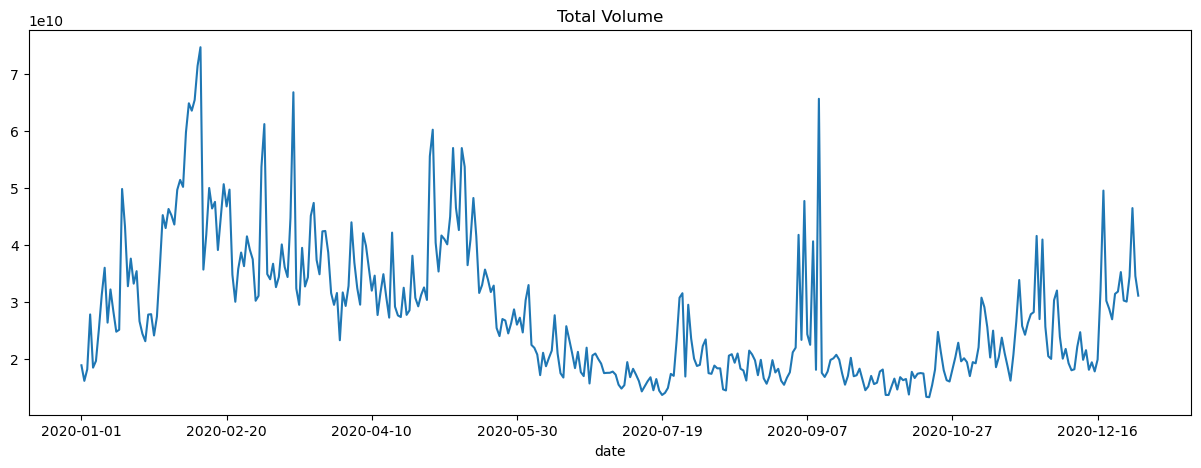

In [9]:
#graphique de la colonne total_volume
df['total_volume'].plot(figsize=(15, 5), title='Total Volume')
plt.show()

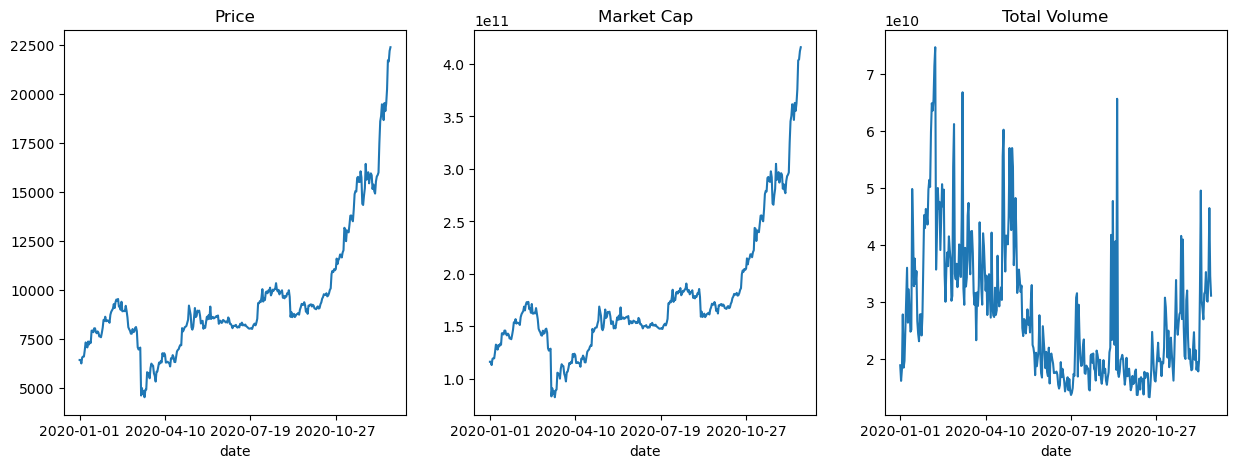

In [10]:
plt.figure(figsize=(15, 5))

#intégration des différents schémas dans la figure
plt.subplot(1, 3, 1)
df['price'].plot(title='Price')
plt.subplot(1, 3, 2)
df['market_cap'].plot(title='Market Cap')
plt.subplot(1, 3, 3)
df['total_volume'].plot(title='Total Volume')

plt.show()

In [11]:
df.index

# changer le dtype de la colonne date en datetime
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='date', length=365, freq=None)

<AxesSubplot:xlabel='date'>

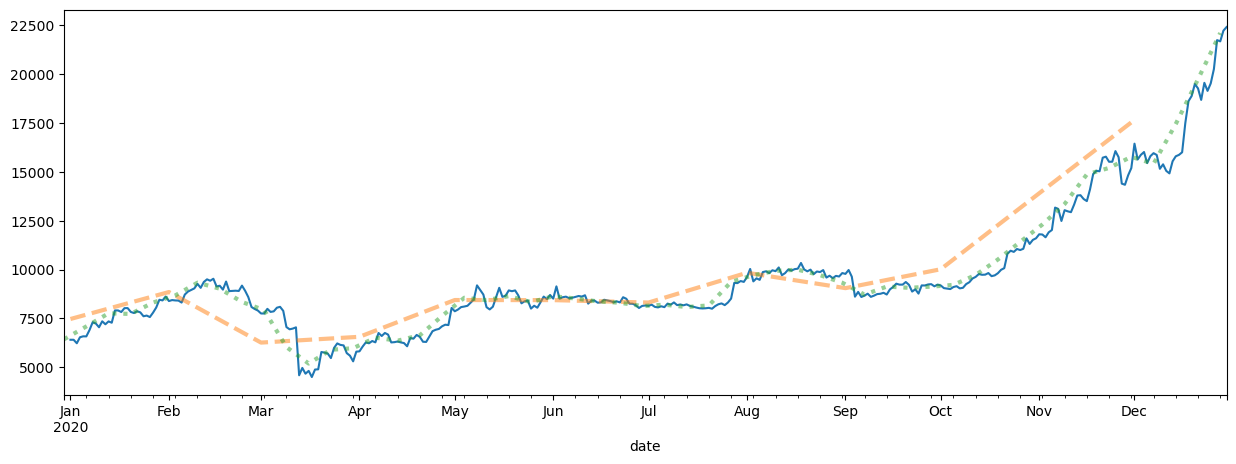

In [12]:
plt.figure(figsize=(15, 5))
df.loc['2020','price'].plot(label='prix 2020')
df.loc['2020','price'].resample('M').mean().plot(label='prix moyen par mois 2020', ls='--', lw=3, alpha=0.5)
df.loc['2020','price'].resample('W').mean().plot(label='prix moyen par semaine 2020', ls=':', lw=3, alpha=0.5)

<AxesSubplot:xlabel='date'>

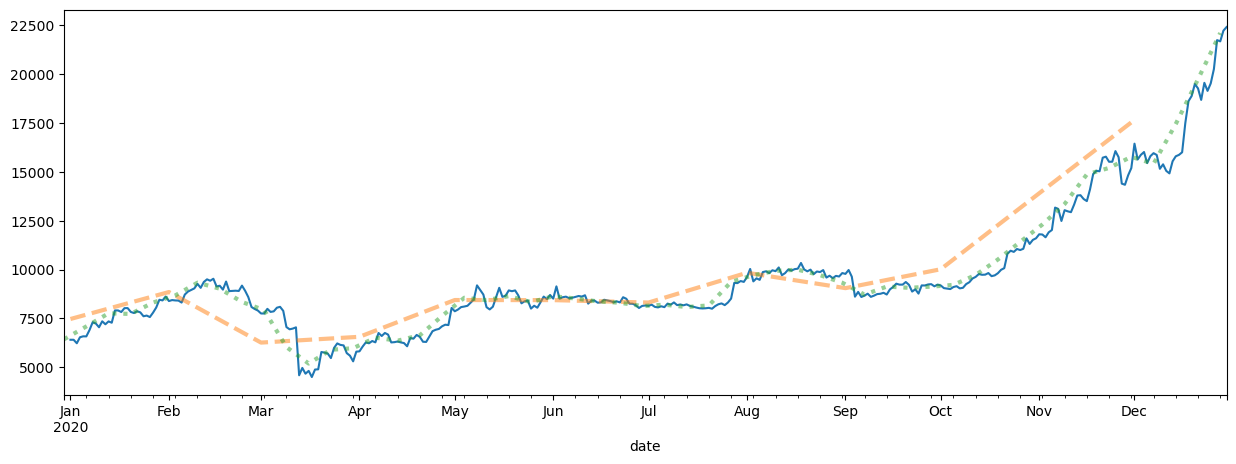

In [13]:
plt.figure(figsize=(15, 5))
df.loc['2020','price'].plot(label='prix 2020')
df.loc['2020','price'].resample('M').mean().plot(label='prix moyen par mois 2020', ls='--', lw=3, alpha=0.5)
df.loc['2020','price'].resample('W').mean().plot(label='prix moyen par semaine 2020', ls=':', lw=3, alpha=0.5)

In [14]:
#intégration de toutes les données en un seul graphique

#mise en place de la figure
plt.figure(figsize=(12,8))

#intégration des différents schéma dans la figure
df.loc['2019','Close'].plot(label = 'BTC sur 2019')
df.loc['2019','Close'].resample('W').mean().plot(label = 'Moyenne par semaine', lw=3, ls=':',alpha=0.8)
df.loc['2019','Close'].resample('M').mean().plot(label = 'Moyenne par mois', lw=3, ls='--',alpha=0.8)
#création de la légende
plt.legend()
#affichage du graphique
plt.show()

KeyError: '2019'

<Figure size 1200x800 with 0 Axes>

In [15]:
import datetime
datejo = datetime.date.today()
# reculer la date de 30 jours
datejo = datejo - datetime.timedelta(days=30)
print(datejo)


2023-01-29


In [18]:
import time
# convertir la date dans le dataframe en timestamp

df.head()


,price,market_cap,total_volume,date
date,,,,
2020-01-01,6412.85,1.162167e+11,1.888419e+10,2020-01-01
2020-01-02,6412.45,1.162156e+11,1.615514e+10,2020-01-02
2020-01-03,6234.20,1.130466e+11,1.818484e+10,2020-01-03
2020-01-04,6541.83,1.189716e+11,2.779318e+10,2020-01-04
2020-01-05,6587.55,1.196064e+11,1.847005e+10,2020-01-05
